In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
data = pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93612 entries, 0 to 93611
Data columns (total 7 columns):
Date      93612 non-null object
Open      93587 non-null float64
High      93602 non-null float64
Low       93592 non-null float64
Close     93612 non-null float64
Volume    93612 non-null int64
Name      93612 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 5.0+ MB


In [4]:
data['Name'].unique()

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'GOOGL', 'AMZN', 'AABA'], dtype=object)

In [5]:
df_ibm= data[data['Name']== 'IBM']

In [6]:
df_ibm.head()

,Date,Open,High,Low,Close,Volume,Name
39258,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
39259,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
39260,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
39261,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
39262,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [7]:
df_ibm= df_ibm[['Date','Close']]

In [8]:
df_ibm.head()

,Date,Close
39258,2006-01-03,82.06
39259,2006-01-04,81.95
39260,2006-01-05,82.50
39261,2006-01-06,84.95
39262,2006-01-09,83.73


In [9]:
df_ibm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3020 entries, 39258 to 42277
Data columns (total 2 columns):
Date     3020 non-null object
Close    3020 non-null float64
dtypes: float64(1), object(1)
memory usage: 70.8+ KB


In [10]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df_ibm['Date']=df_ibm['Date'].apply(dateparse)
print (df_ibm.head())

            Date  Close
39258 2006-01-03  82.06
39259 2006-01-04  81.95
39260 2006-01-05  82.50
39261 2006-01-06  84.95
39262 2006-01-09  83.73


In [11]:
df_ibm.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [12]:
df_ibm=df_ibm.set_index('Date')

In [13]:
df_ibm.head()

,Close
Date,
2006-01-03,82.06
2006-01-04,81.95
2006-01-05,82.50
2006-01-06,84.95
2006-01-09,83.73


In [14]:
df_ibm.index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=3020, freq=None)

In [15]:
df_ibm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 1 columns):
Close    3020 non-null float64
dtypes: float64(1)
memory usage: 47.2 KB


In [16]:
df_ibm['2006']

,Close
Date,
2006-01-03,82.06
2006-01-04,81.95
2006-01-05,82.50
2006-01-06,84.95
2006-01-09,83.73
2006-01-10,84.07
2006-01-11,84.17
2006-01-12,83.57
2006-01-13,83.17


In [17]:
ts=df_ibm['2017']

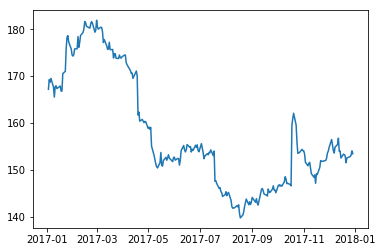

In [18]:
plt.plot(ts)

In [19]:
ts=df_ibm['Close']

In [46]:
ts=ts.resample('D').bfill()

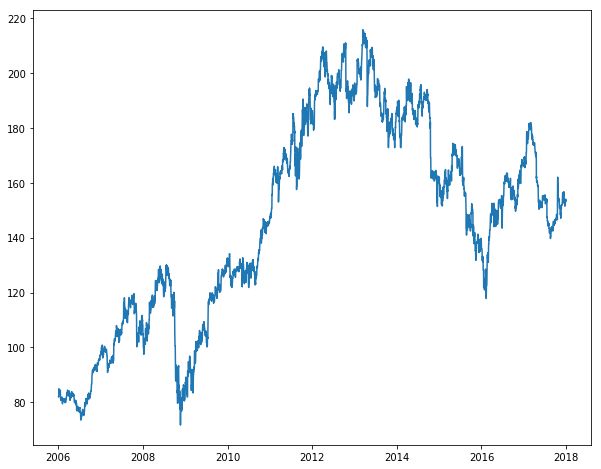

In [47]:
plt.figure(figsize=(10,8))
plt.plot(ts)

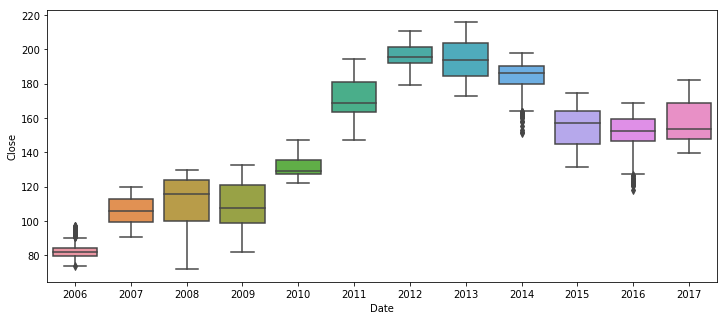

In [21]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(ts.index.year, ts, ax=ax)

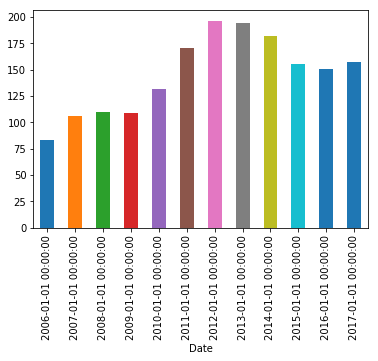

In [48]:
ts.resample('AS').mean().plot.bar()

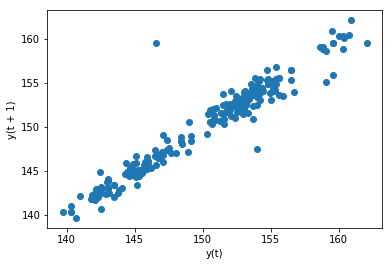

In [49]:
from pandas.plotting import lag_plot

lag_plot(ts.tail(250))

### Checking for stationarity

In [50]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series.rolling(timeseries, window=365).mean()
    rolstd = pd.Series.rolling(timeseries, window=365).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

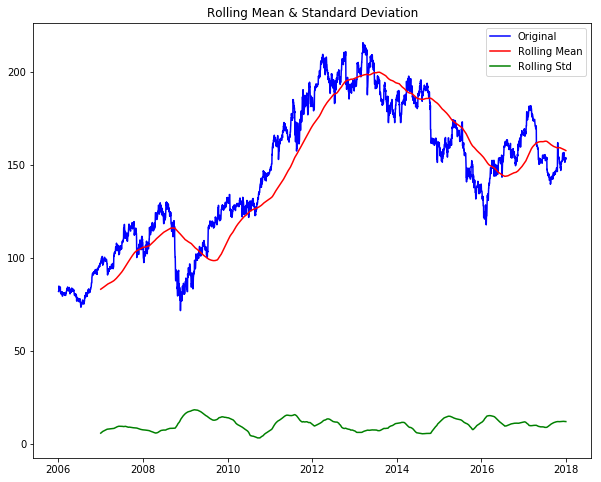

Results of Dickey-Fuller Test:
Test Statistic                   -1.771208
p-value                           0.394847
#Lags Used                       15.000000
Number of Observations Used    4363.000000
Critical Value (5%)              -2.862203
Critical Value (1%)              -3.431850
Critical Value (10%)             -2.567123
dtype: float64


In [51]:
plt.figure(figsize=(10,8))
test_stationarity(ts)

# Estimating & Eliminating Trend

### log transform

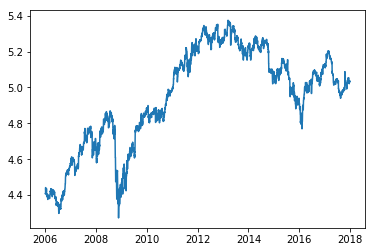

In [52]:
ts_log = np.log(ts)
plt.plot(ts_log)

###  Moving average

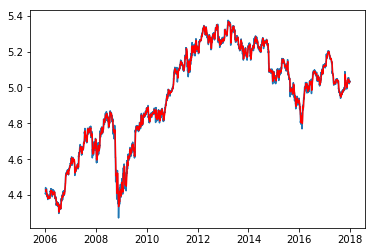

In [53]:
moving_avg = pd.Series.rolling(ts_log,7).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [54]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(30)

Date
2006-01-03         NaN
2006-01-04         NaN
2006-01-05         NaN
2006-01-06         NaN
2006-01-07         NaN
2006-01-08         NaN
2006-01-09    0.005995
2006-01-10    0.006591
2006-01-11    0.003961
2006-01-12   -0.005034
2006-01-13   -0.006806
2006-01-14   -0.007602
2006-01-15   -0.006351
2006-01-16   -0.005100
2006-01-17   -0.003270
2006-01-18    0.013676
2006-01-19   -0.001854
2006-01-20   -0.019752
2006-01-21   -0.016374
2006-01-22   -0.013611
2006-01-23   -0.010848
2006-01-24   -0.014001
2006-01-25   -0.007125
2006-01-26   -0.005342
2006-01-27   -0.001034
2006-01-28    0.006081
2006-01-29    0.005696
2006-01-30    0.005310
2006-01-31    0.000467
2006-02-01    0.006501
Freq: D, Name: Close, dtype: float64

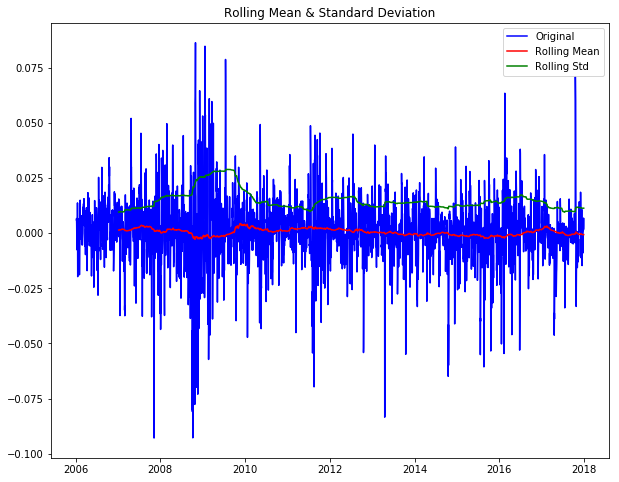

Results of Dickey-Fuller Test:
Test Statistic                -1.426032e+01
p-value                        1.430347e-26
#Lags Used                     1.700000e+01
Number of Observations Used    4.355000e+03
Critical Value (5%)           -2.862204e+00
Critical Value (1%)           -3.431852e+00
Critical Value (10%)          -2.567123e+00
dtype: float64


In [55]:
plt.figure(figsize=(10,8))
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

### exponentially weighted moving average 

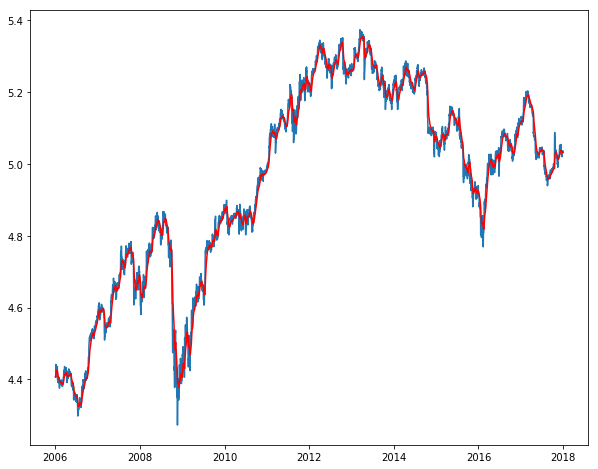

In [56]:
expwighted_avg = ts_log.ewm(halflife=7).mean()
plt.figure(figsize=(10,8))
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

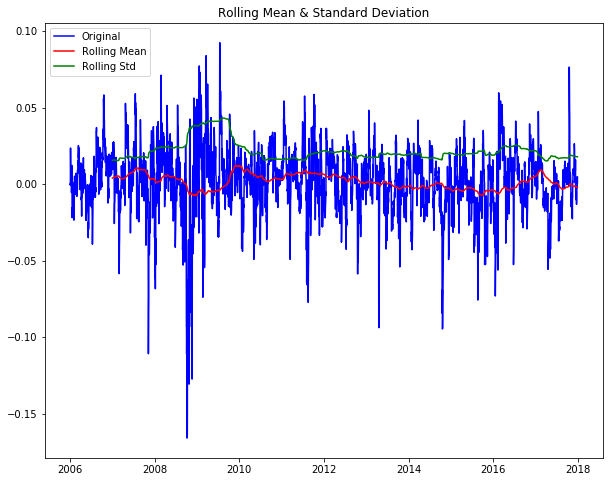

Results of Dickey-Fuller Test:
Test Statistic                -1.116794e+01
p-value                        2.684953e-20
#Lags Used                     1.400000e+01
Number of Observations Used    4.364000e+03
Critical Value (5%)           -2.862203e+00
Critical Value (1%)           -3.431849e+00
Critical Value (10%)          -2.567123e+00
dtype: float64


In [57]:
plt.figure(figsize=(10,8))
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

# Eliminating Trend and Seasonality

### Differencing

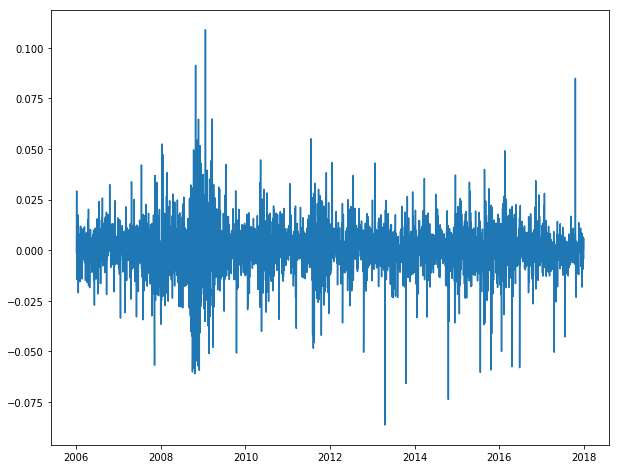

In [58]:
plt.figure(figsize=(10,8))
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

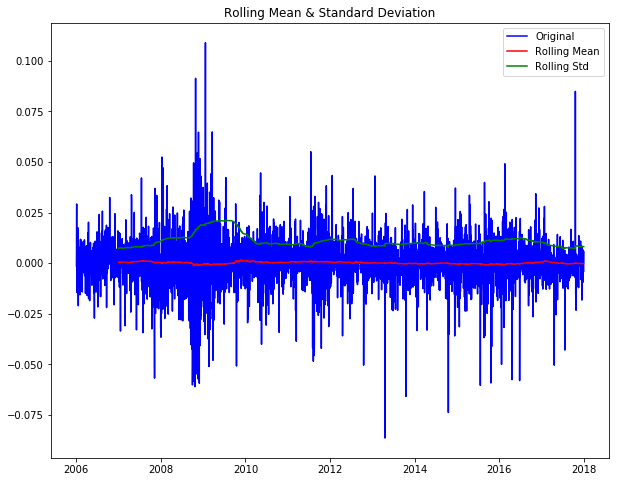

Results of Dickey-Fuller Test:
Test Statistic                -1.842330e+01
p-value                        2.174517e-30
#Lags Used                     1.300000e+01
Number of Observations Used    4.364000e+03
Critical Value (5%)           -2.862203e+00
Critical Value (1%)           -3.431849e+00
Critical Value (10%)          -2.567123e+00
dtype: float64


In [59]:
plt.figure(figsize=(10,8))
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### Decomposing

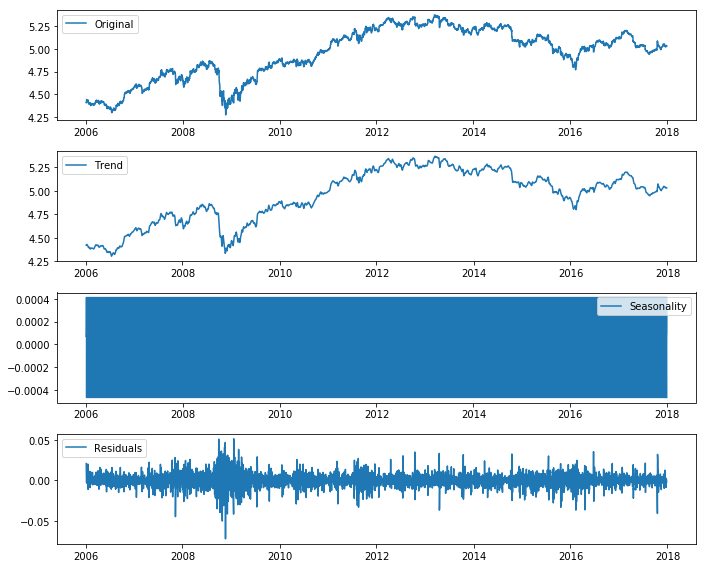

In [60]:
plt.figure(figsize=(10,8))
decomposition = seasonal_decompose(ts_log, freq=7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### check stationarity of residuals

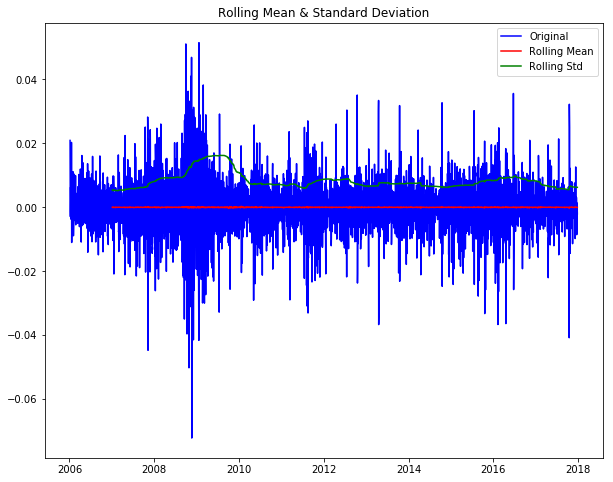

Results of Dickey-Fuller Test:
Test Statistic                  -19.282880
p-value                           0.000000
#Lags Used                       31.000000
Number of Observations Used    4341.000000
Critical Value (5%)              -2.862206
Critical Value (1%)              -3.431857
Critical Value (10%)             -2.567125
dtype: float64


In [61]:
plt.figure(figsize=(10,8))
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

# Forecasting a Time Series

### The ACF and PACF

In [68]:
lag_acf = acf(ts_log_decompose, nlags=7)
lag_pacf = pacf(ts_log_decompose, nlags=7, method='ols')

Text(0.5,1,'Autocorrelation Function')

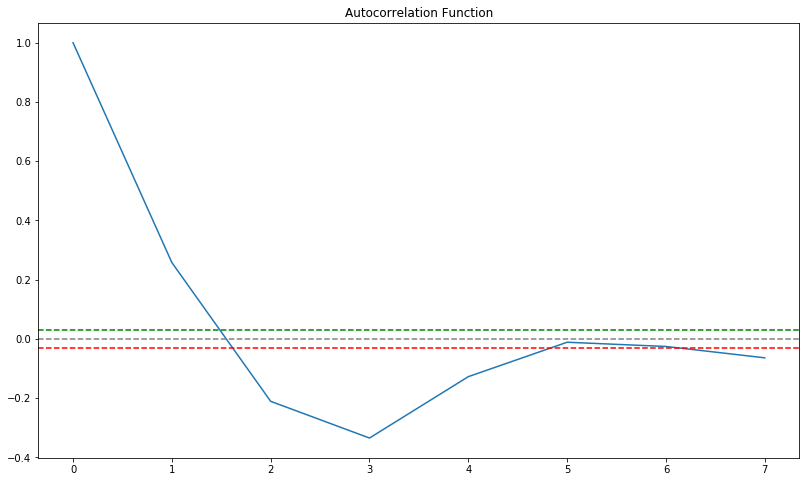

In [69]:
#Plot ACF:
plt.figure(figsize=(30,8))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_decompose)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(ts_log_decompose)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

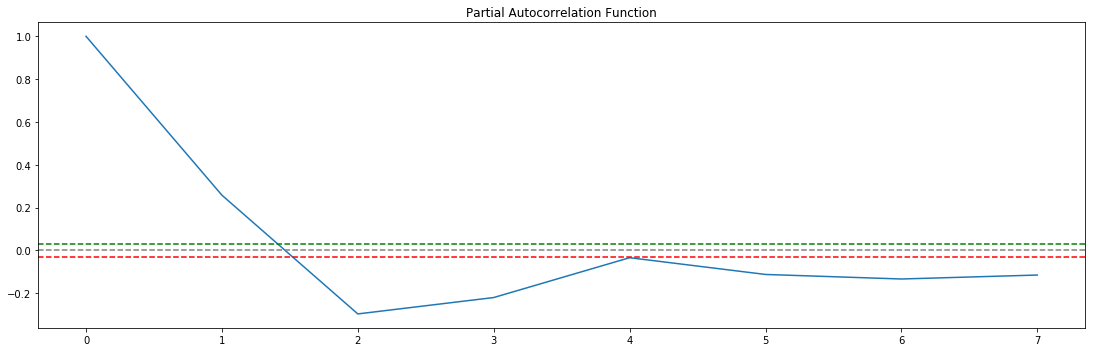

In [70]:
#Plot PACF:
plt.figure(figsize=(30,5))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_decompose)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(ts_log_decompose)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# ARIMA model

### AR Model

Text(0.5,1,'RSS: 0.2690')

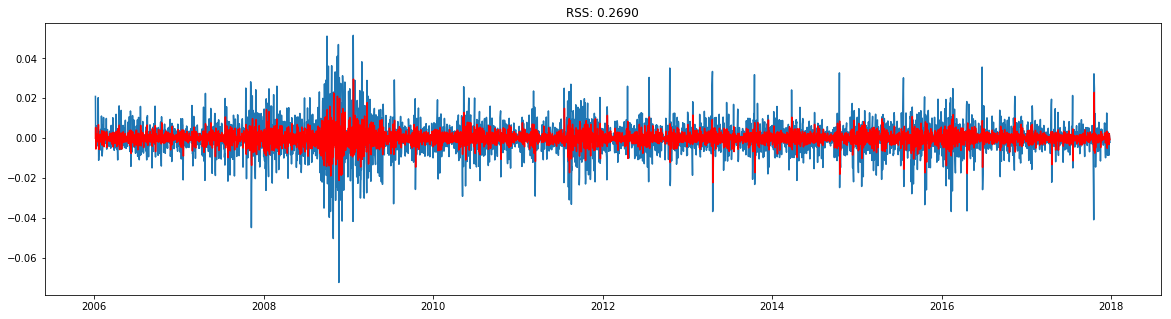

In [81]:
model = ARIMA(ts_log_decompose, order=(2, 0, 0))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(20,5))
plt.plot(ts_log_decompose)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_decompose)**2))

### MA Model

Text(0.5,1,'RSS: 0.2848')

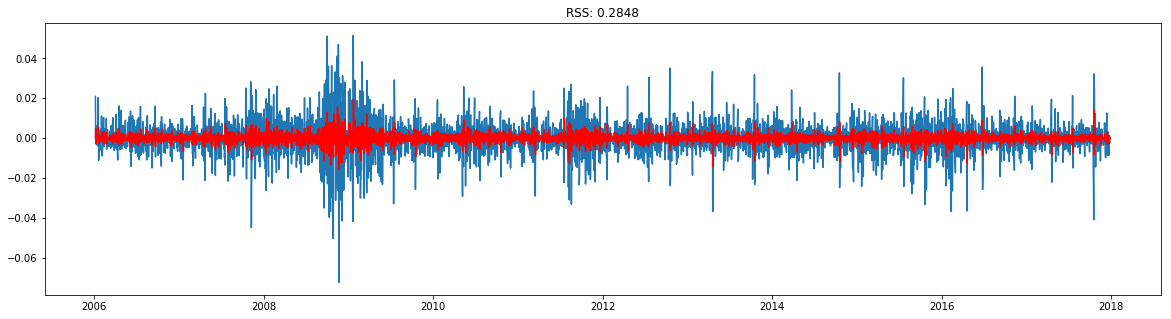

In [87]:
model = ARIMA(ts_log_decompose, order=(0, 0, 2))  
results_MA = model.fit(disp=-1)  
plt.figure(figsize=(20,5))
plt.plot(ts_log_decompose)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_decompose)**2))

### Combined Model

Text(0.5,1,'RSS: 0.2241')

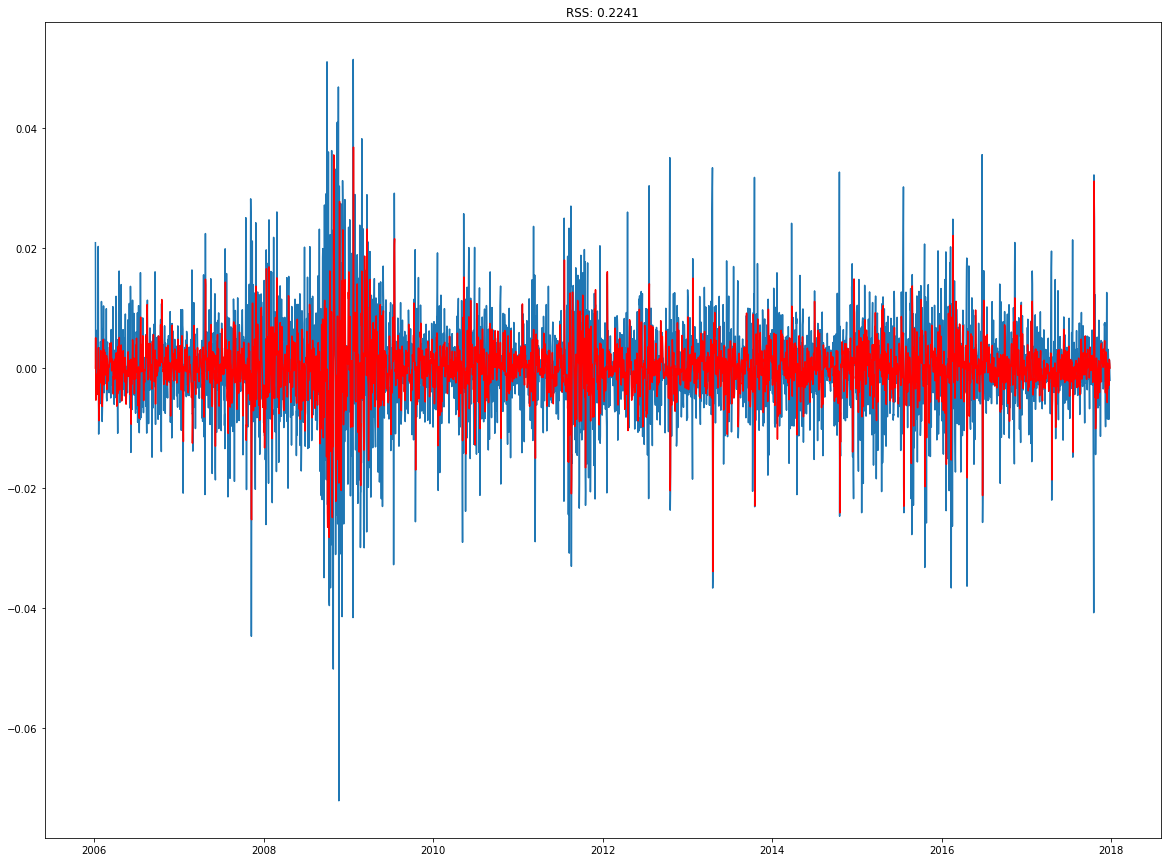

In [93]:
model = ARIMA(ts_log_decompose, order=(2, 0, 2))  
results_ARIMA = model.fit(disp=-1) 
plt.figure(figsize=(20,15))
plt.plot(ts_log_decompose)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_decompose)**2))

# Back to original scale

In [95]:
predictions_ARIMA_decomp = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_decomp.head())

Date
2006-01-06    5.556134e-08
2006-01-07    5.053197e-03
2006-01-08   -5.339814e-03
2006-01-09   -4.215684e-03
2006-01-10   -3.779286e-03
Freq: D, dtype: float64


In [96]:
predictions_ARIMA_log=predictions_ARIMA_decomp+seasonal+trend

In [97]:
predictions_ARIMA_log.isnull().sum()

6

Text(0.5,1,'RMSE: 0.9881')

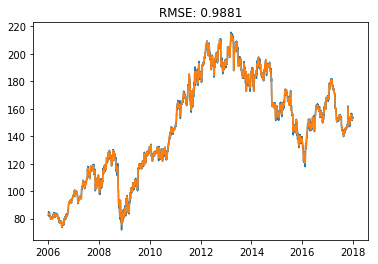

In [98]:
predictions_ARIMA = np.exp(predictions_ARIMA_log).resample('D').bfill()
predictions_ARIMA.dropna(inplace=True)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts[predictions_ARIMA.index])**2)/len(ts[predictions_ARIMA.index])))

In [99]:
pd.concat([predictions_ARIMA, ts[predictions_ARIMA.index]],axis=1 )

,0,Close
Date,,
2006-01-06,83.190904,84.95
2006-01-07,83.949308,83.73
2006-01-08,83.387273,83.73
2006-01-09,83.622950,83.73
2006-01-10,83.428140,84.07
2006-01-11,83.555521,84.17
2006-01-12,83.411627,83.57
2006-01-13,83.019755,83.17
2006-01-14,82.945735,83.00
